In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import scipy
import math

In [2]:
#Function
def Fitfunction(x, m, b):
    return m*x+b

def Residual(x, m, b):
    return m*x+b

#Fonts
font = {'size'   : 16}
plt.rc('font', **font)

In [3]:
#Data
x_array = 
y_array =
xerr = 
yerr = 

sigma = []
for x, y in zip(xerr, yerr):
    value = math.sqrt(x**2 + y**2)
    sigma = np.append(sigma, value)   

In [4]:
#Fitting
popt, pcov = scipy.optimize.curve_fit(Fitfunction, x_array, y_array, sigma = sigma,
                                      absolute_sigma = True
                                        #,bounds = ( (0,3.1,0), (20,3.3,.2)) #(lower), (upper)
                                        )
std_dev = np.sqrt(np.diag(pcov))
print(std_dev)
print(popt)



[0.24031014 0.39567488]
[ 1.07719505 -0.19446081]


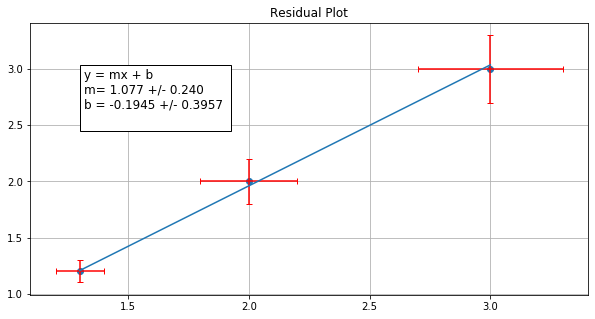

In [5]:
#Graphing
YLABEL = ""
XLABEL = ""
TITLE = ""

fig = plt.figure(figsize=(10,5))
plt.scatter(x_array, y_array, c = 'b', s = 1)
plt.errorbar(x_array, y_array, yerr=yerr, xerr=xerr, fmt='o', ecolor='r', elinewidth=None, capsize=3, 
                               barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, 
                               errorevery=1, capthick=None, data=None)

smooth_x = np.linspace(np.min(x_array), np.max(x_array), 1000)
fit = Fitfunction(smooth_x, *popt) #popt is the number of curves
plt.plot(smooth_x, fit)
plt.ylabel(YLABEL)
plt.xlabel(XLABEL)
plt.title(TITLE)
fig.text(.2, .6, 
         "y = mx + b \nm= %0.4f +/- %0.4f \n" 
         "b = %0.4f +/- %0.4f \n" % 
         (popt[0], std_dev[0], popt[1], std_dev[1])
         ,bbox={'facecolor': 'w'}, fontsize=12)
plt.grid(b=None, which='both', axis='both')
plt.show()

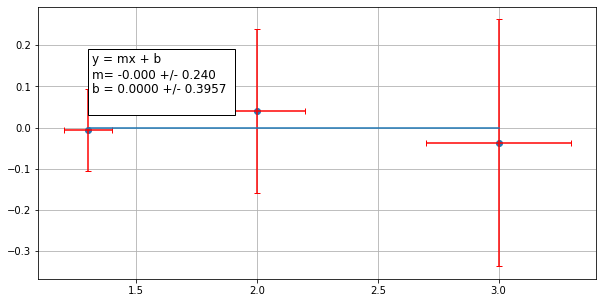

In [6]:
#Residual
Fit_Data = [Fitfunction(x, *popt)for x in x_array ]
ResidualArr = []
for orig, fit in zip(y_array, Fit_Data):
    ResidualArr = np.append(ResidualArr, orig - fit)
poptRes, pcovRes = scipy.optimize.curve_fit(Residual, x_array, ResidualArr, sigma = sigma)
std_dev_Res = np.sqrt(np.diag(pcovRes))

smooth_x = np.linspace(np.min(x_array), np.max(x_array), 1000)
fitRes = Residual(smooth_x, *poptRes) #popt is the number of curves
    

YLABEL = ""
XLABEL = ""
TITLE = ""

fig = plt.figure(figsize=(10,5))
plt.scatter(x_array, ResidualArr, c = 'b', s = 1)
plt.errorbar(x_array, ResidualArr, yerr=yerr, xerr=xerr, fmt='o', ecolor='r', elinewidth=None, capsize=3, 
                               barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, 
                               errorevery=1, capthick=None, data=None)
plt.plot(smooth_x, fitRes)
plt.ylabel(YLABEL)
plt.xlabel(XLABEL)
plt.title(TITLE)
fig.text(.2, .6, 
         "y = mx + b \nm= %0.4f +/- %0.4f \n" 
         "b = %0.4f +/- %0.4f \n" % 
         (poptRes[0], std_dev_Res[0], poptRes[1], std_dev_Res[1])
         ,bbox={'facecolor': 'w'}, fontsize=12)
plt.grid(b=None, which='both', axis='both')
plt.show()    